# Modelo Projeto de Data Science Regressão - Básico

# Conteúdo

Básico - Regressão
- Análise e tratamento dos dados qualitativos
- Análise e tratamento dos dados quantitativos
- Visualização de Dados (matplotlib e seaborn)
- Tratamento de dados com pandas e numpy
- Processamento dos dados (get dummies)
- Regressão Linear Múltipla
- Seleção de variáveis (Backward)
- Multicolinearidade (VIF) e Análise de resíduos
- Validação (r^2)

# Analise dos dados

## Leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('dark_background')

In [2]:
train = pd.read_csv('cars_train.csv')
test = pd.read_csv('cars_test.csv')

In [3]:
train

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,200Nm@ 1400-3400rpm,7.0
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,5684,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
5685,5685,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
5686,5686,Mahindra Scorpio S10 7 Seater,2015,1125000,70000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
5687,5687,Maruti Ciaz RS ZDi Plus SHVS,2017,844999,70000,Diesel,Dealer,Manual,First Owner,28.09 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0


In [4]:
train.info() # ver o Dtype de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5689 non-null   int64  
 1   name           5689 non-null   object 
 2   year           5689 non-null   int64  
 3   selling_price  5689 non-null   int64  
 4   km_driven      5689 non-null   int64  
 5   fuel           5689 non-null   object 
 6   seller_type    5689 non-null   object 
 7   transmission   5689 non-null   object 
 8   owner          5689 non-null   object 
 9   mileage        5533 non-null   object 
 10  engine         5533 non-null   object 
 11  max_power      5538 non-null   object 
 12  torque         5532 non-null   object 
 13  seats          5533 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 622.4+ KB


## Tratamento inicial dos dados

In [5]:
train.isnull().sum()

id                 0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          156
engine           156
max_power        151
torque           157
seats            156
dtype: int64

In [6]:
# Removendo os nulls do train
train = train.dropna()
train.isnull().sum()

id               0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [7]:
# Transformando as colunas Mileage, Engine e Max_power em int
train['mileage'] = train['mileage'].str.replace(r'\D', '').astype(int)
train['engine'] = train['engine'].str.replace(r'\D', '').astype(int)
train['max_power'] = train['max_power'].str.replace(r'\D', '').astype(int)

c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [8]:
train

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,161,796,37,59Nm@ 2500rpm,4.0
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,214,1197,831,115Nm@ 4000rpm,5.0
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,1299,2494,100,200Nm@ 1400-3400rpm,7.0
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,197,796,463,62Nm@ 3000rpm,5.0
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,5684,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0
5685,5685,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,1299,2494,1006,200Nm@ 1200-3600rpm,7.0
5686,5686,Mahindra Scorpio S10 7 Seater,2015,1125000,70000,Diesel,Individual,Manual,First Owner,154,2179,120,280Nm@ 1800-2800rpm,7.0
5687,5687,Maruti Ciaz RS ZDi Plus SHVS,2017,844999,70000,Diesel,Dealer,Manual,First Owner,2809,1248,885,200Nm@ 1750rpm,5.0


In [9]:
# Adicionando uma coluna para a marca do carro e outra para o modelo
train['marca'] = train['name'].str.split(' ').str[0]
train['model'] = train['name'].str.split(' ').str[0] + " " + train['name'].str.split(' ').str[1]

c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
train

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,marca,model
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,161,796,37,59Nm@ 2500rpm,4.0,Maruti,Maruti 800
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,214,1197,831,115Nm@ 4000rpm,5.0,Maruti,Maruti Baleno
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,1299,2494,100,200Nm@ 1400-3400rpm,7.0,Toyota,Toyota Innova
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,197,796,463,62Nm@ 3000rpm,5.0,Maruti,Maruti Alto
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0,Ford,Ford Ecosport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,5684,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0,Ford,Ford Ecosport
5685,5685,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,1299,2494,1006,200Nm@ 1200-3600rpm,7.0,Toyota,Toyota Innova
5686,5686,Mahindra Scorpio S10 7 Seater,2015,1125000,70000,Diesel,Individual,Manual,First Owner,154,2179,120,280Nm@ 1800-2800rpm,7.0,Mahindra,Mahindra Scorpio
5687,5687,Maruti Ciaz RS ZDi Plus SHVS,2017,844999,70000,Diesel,Dealer,Manual,First Owner,2809,1248,885,200Nm@ 1750rpm,5.0,Maruti,Maruti Ciaz


## Matriz de Correlação

dython: nominal.associations

Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: 
- Pearson's R for continuous-continuous cases 
- Correlation Ratio for categorical-continuous cases 
- Cramer's V or Theil's U for categorical-categorical cases

In [11]:
from dython import nominal

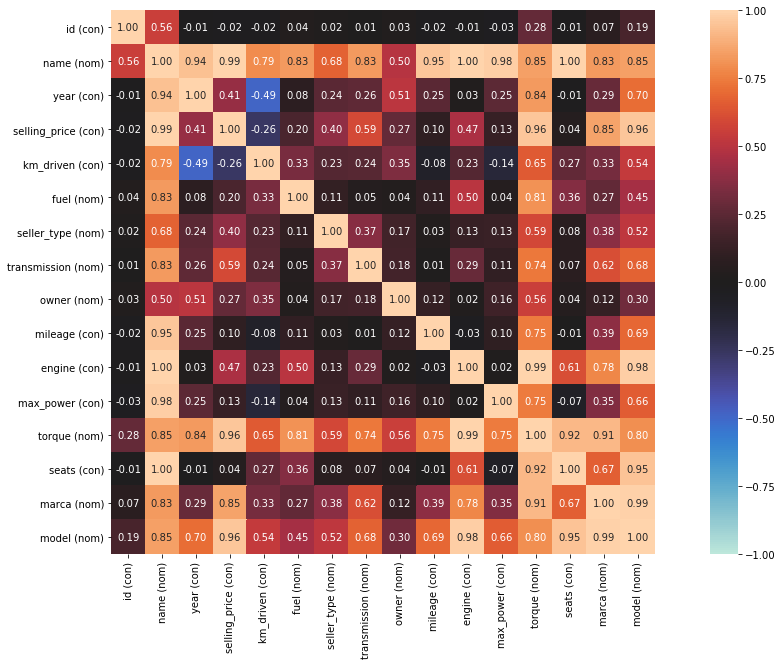

In [12]:
nominal.associations(train, figsize=(20,10),mark_columns=True);

## Análise dos dados qualitativos

In [13]:
train.columns

Index(['id', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'marca', 'model'],
      dtype='object')

In [14]:
train_quali = train.loc[:,['fuel', 'seller_type', 'transmission', 'owner']]
train_quali

,fuel,seller_type,transmission,owner
0,Petrol,Individual,Manual,Second Owner
1,Petrol,Individual,Manual,First Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,Third Owner
4,Diesel,Dealer,Manual,First Owner
...,...,...,...,...
5684,Diesel,Dealer,Manual,First Owner
5685,Diesel,Trustmark Dealer,Manual,Second Owner
5686,Diesel,Individual,Manual,First Owner
5687,Diesel,Dealer,Manual,First Owner


In [15]:
for i in train_quali.columns:
    print(train_quali['%s' %(i)].value_counts())
    print('')

Diesel    3012
Petrol    2461
CNG         34
LPG         25
Name: fuel, dtype: int64

Individual          4591
Dealer               773
Trustmark Dealer     168
Name: seller_type, dtype: int64

Manual       4784
Automatic     748
Name: transmission, dtype: int64

First Owner             3670
Second Owner            1393
Third Owner              363
Fourth & Above Owner     103
Test Drive Car             3
Name: owner, dtype: int64



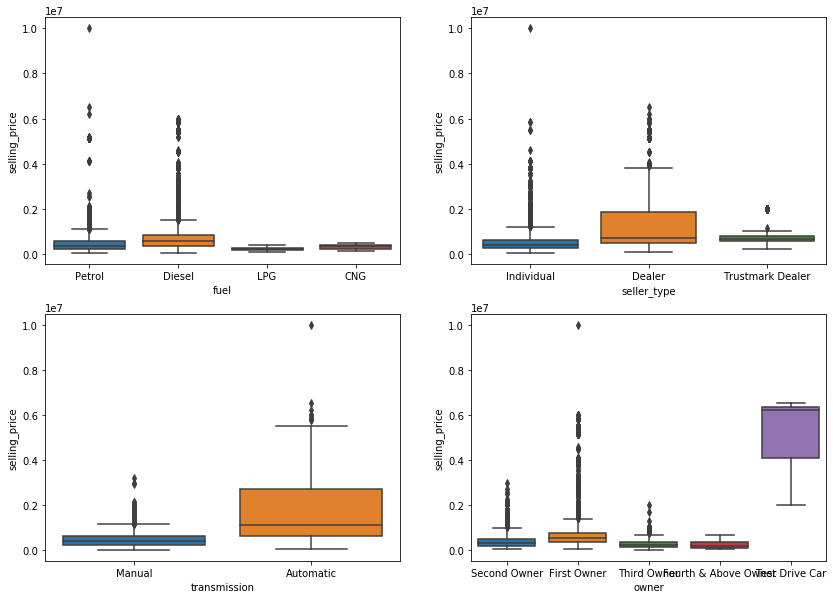

In [16]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x="fuel", y="selling_price", data = train)

plt.subplot(2, 2, 2)
sns.boxplot(x="seller_type", y="selling_price", data = train)

plt.subplot(2, 2, 3)
sns.boxplot(x="transmission", y="selling_price", data = train)

plt.subplot(2, 2, 4)
sns.boxplot(x="owner", y="selling_price", data = train)

plt.show()

## Análise dos dados quantitativos

In [17]:
train_quant = train.copy().drop(columns=['id', 'name', 'torque', 'model'])
train_quant = train_quant.drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'marca'])
display(train_quant)

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2006,65000,120000,161,796,37,4.0
1,2017,550000,46000,214,1197,831,5.0
2,2012,730000,210000,1299,2494,100,7.0
3,2010,135000,95000,197,796,463,5.0
4,2016,515000,68609,227,1498,8984,5.0
...,...,...,...,...,...,...,...
5684,2016,515000,68609,227,1498,8984,5.0
5685,2013,750000,79328,1299,2494,1006,7.0
5686,2015,1125000,70000,154,2179,120,7.0
5687,2017,844999,70000,2809,1248,885,5.0


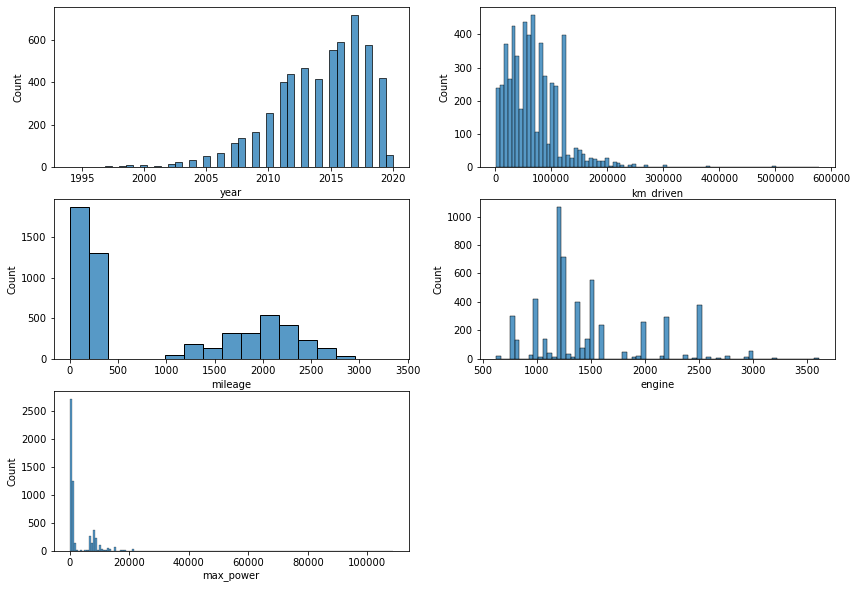

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(x="year", data = train)

plt.subplot(3, 2, 2)
sns.histplot(x = 'km_driven', data = train)

plt.subplot(3, 2, 3)
sns.histplot(x="mileage", data = train)

plt.subplot(3, 2, 4)
sns.histplot(x="engine", data = train)

plt.subplot(3, 2, 5)
sns.histplot(x="max_power", data = train)

plt.show()

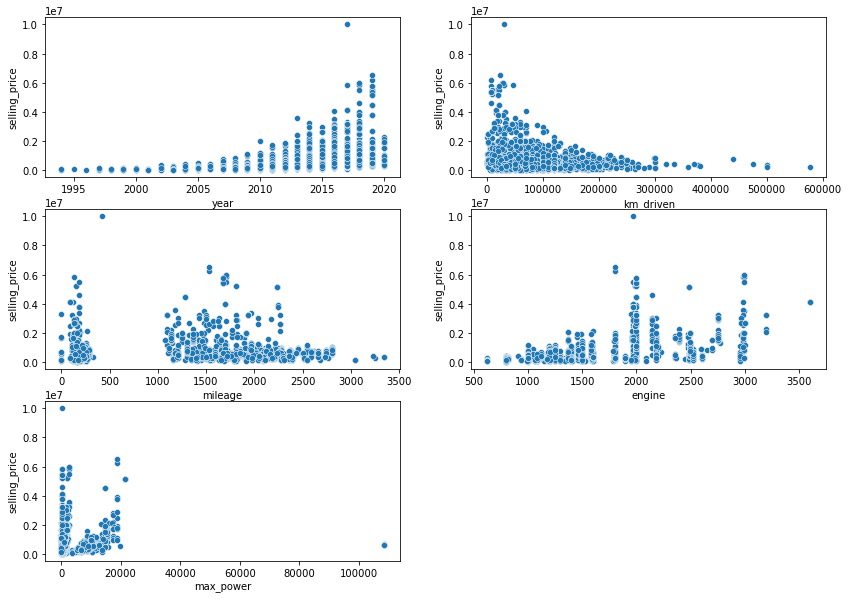

In [19]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x="year", y="selling_price", data = train)

plt.subplot(3, 2, 2)
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = train)

plt.subplot(3, 2, 3)
sns.scatterplot(x="mileage", y="selling_price", data = train)

plt.subplot(3, 2, 4)
sns.scatterplot(x="engine", y="selling_price", data = train)

plt.subplot(3, 2, 5)
sns.scatterplot(x="max_power", y="selling_price", data = train)

plt.show()

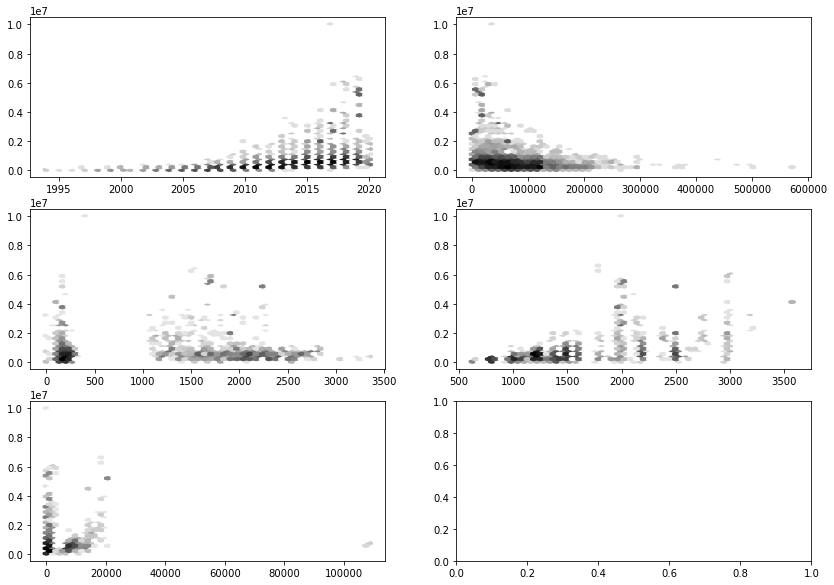

In [20]:
fig, axs = plt.subplots(3,2, figsize=(14, 10))

ax = axs[0,0]
ax.hexbin(x="year", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')

ax = axs[0,1]
ax.hexbin(x='km_driven', y = 'selling_price', data = train, gridsize=50, bins='log', cmap='binary')

ax = axs[1,0]
ax.hexbin(x="mileage", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')

ax = axs[1,1]
ax.hexbin(x="engine", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')

ax = axs[2,0]
ax.hexbin(x="max_power", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')

plt.show()

## Tratamento da base de teste

In [21]:
test.isnull().sum()

id              0
name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
dtype: int64

In [22]:
test['marca'] = test['name'].str.split(' ').str[0]

test['mileage'] = test['mileage'].str.replace(r'\D', '').astype(int)

test['engine'] = test['engine'].str.replace(r'\D', '').astype(int)

test['max_power'] = test['max_power'].str.replace(r'\D', '').astype(int)

test = test.drop(columns = ['id','name','torque'])

In [23]:
test

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,marca
0,2018,25000,Petrol,Individual,Manual,First Owner,2121,1197,8180,5.0,Maruti
1,2017,43000,Diesel,Dealer,Manual,First Owner,2254,1396,8873,5.0,Hyundai
2,2014,15000,Petrol,Individual,Manual,Second Owner,2274,796,473,5.0,Maruti
3,2017,60000,Diesel,Dealer,Automatic,Second Owner,1255,2982,1685,7.0,Toyota
4,2019,7032,Petrol,Trustmark Dealer,Automatic,First Owner,190,1199,8876,5.0,Honda
...,...,...,...,...,...,...,...,...,...,...,...
2369,2015,53000,Petrol,Individual,Manual,Second Owner,2274,796,473,5.0,Maruti
2370,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,182,1199,887,5.0,Honda
2371,2015,110000,Diesel,Individual,Manual,First Owner,2659,1248,74,5.0,Maruti
2372,2010,110000,Diesel,Individual,Manual,Second Owner,200,1399,68,5.0,Ford


## Modelagem

### Linear regression

In [24]:
train.columns

Index(['id', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'marca', 'model'],
      dtype='object')

In [25]:
# Removendo as colunas Id, name, torque, model

train_lr = train.copy().drop(columns = ['id','name','torque','model'])

train_lr = pd.get_dummies(train_lr)

train_lr.tail(5)

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Opel,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
5684,2016,515000,68609,227,1498,8984,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5685,2013,750000,79328,1299,2494,1006,7.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5686,2015,1125000,70000,154,2179,120,7.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5687,2017,844999,70000,2809,1248,885,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5688,2005,150000,120000,178,1399,68,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = train_lr.loc[:, "selling_price"]
x = train_lr.drop(columns=["selling_price"])

In [27]:
x

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,...,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Opel,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
0,2006,120000,161,796,37,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017,46000,214,1197,831,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,210000,1299,2494,100,7.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,95000,197,796,463,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,68609,227,1498,8984,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2016,68609,227,1498,8984,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5685,2013,79328,1299,2494,1006,7.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5686,2015,70000,154,2179,120,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5687,2017,70000,2809,1248,885,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Calculei os VIFs(Variance inflation factor) para retirar o efeito da multicolinearidade, excluindo as colunas com VIFs maiores do que 5

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculatevif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping '' + X.iloc[:, variables].columns[maxloc] + '' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [29]:
X = calculatevif(x)

c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 6
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 9
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 11
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 12
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 36
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 0
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 4
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 2
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 3
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 7
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 5
Remaining variables:
Index(['km_driven', 'mileage', 'max_power', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'marca_Ambassador', 'marca_Ashok', 'marca_Audi', 'm

In [30]:
# Separar a base em treino e teste para validaçao

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
# Criando o modelo

import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     370.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:16:49   Log-Likelihood:                -59214.
No. Observations:                4149   AIC:                         1.185e+05
Df Residuals:                    4108   BIC:                         1.188e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         7.715e+05   2.07e+04     37.274      0.000    7.31e+05    8.12e+05
km_driven                       -2.5044      0.150    -16.704      0.000      -2.798      -2.210
mileage                         -2.8884      7.084     -0.408      0.683     -16.776      10.999
max_power                        4.9165      1.230      3.996      0.000       2.504       7.329
fuel_LPG                     -2.526e+05   9.42e+04     -2.683      0.007   -4.37e+05    -6.8e+04
fuel_Petrol                  -2.291e+05   1.45e+04    -15.835      0.000   -2.57e+05   -2.01e+05
seller_type_Trustmark Dealer  2.681e+04   3.81e+04      0.703      0.482   -4.79e+04    1.02e+05
owner_Fourth & Above Owner   -2.627e+05   4.69e+04     -5.600      0.000   -3.55e+05   -1.71e+05
owner_Second Owner           -1.776e+05   1.48e+04    -11.984      0.000   -2.07e+05   -1.49e+05
owner_Test Drive Car          2.711e+06   2.75e+05      9.849      0.000    2.17e+06    3.25e+06
owner_Third Owner             -1.89e+05   2.49e+04     -7.585      0.000   -2.38e+05    -1.4e+05
marca_Ambassador             -2.444e+05   3.84e+05     -0.636      0.525   -9.98e+05    5.09e+05
marca_Ashok                   2.124e+05   3.85e+05      0.552      0.581   -5.42e+05    9.66e+05
marca_Audi                    1.811e+06   8.23e+04     22.013      0.000    1.65e+06    1.97e+06
marca_BMW                     3.633e+06   5.24e+04     69.296      0.000    3.53e+06    3.74e+06
marca_Chevrolet              -1.325e+05   3.74e+04     -3.542      0.000   -2.06e+05   -5.92e+04
marca_Daewoo                 -2.615e+05   2.22e+05     -1.178      0.239   -6.97e+05    1.74e+05
marca_Datsun                 -1.132e+05    7.5e+04     -1.510      0.131    -2.6e+05    3.38e+04
marca_Fiat                    -1.07e+05   8.69e+04     -1.232      0.218   -2.77e+05    6.33e+04
marca_Force                   2.827e+05   1.93e+05      1.468      0.142   -9.49e+04     6.6e+05
marca_Ford                     3.98e+04   2.95e+04      1.351      0.177    -1.8e+04    9.76e+04
marca_Honda                   1.706e+05   2.86e+04      5.971      0.000    1.15e+05    2.27e+05
marca_Hyundai                 3.437e+04    1.8e+04      1.906      0.057    -991.019    6.97e+04
marca_Isuzu                    1.25e+06   1.72e+05      7.246      0.000    9.11e+05    1.59e+06
marca_Jaguar                   2.23e+06   6.68e+04     33.380      0.000     2.1e+06    2.36e+06
marca_Jeep                    1.666e+06   1.07e+05     15.507      0.000    1.46e+06    1.88e+06
marca_Kia                     1.136e+06   2.72e+05      4.175      0.000    6.03e+05    1.67e+06
marca_Land                    2.517e+06   1.93e+05     13.065      0.000    2.14e+06    2.89e+06
marca_Lexus                   4.559e+06    9.7e+04     46.987      0.000    

In [33]:
# Removendo as colunas que possuem P-value > 0.05
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['km_driven', 'max_power', 'fuel_LPG', 'fuel_Petrol', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet', 'marca_Honda', 'marca_Isuzu', 'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land', 'marca_Lexus', 'marca_MG', 'marca_Mahindra', 'marca_Mercedes-Benz', 'marca_Mitsubishi', 'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volvo']


In [34]:
# Aplicando o modelo na nova base

model = sm.OLS(y_train, X_train[selected_features_BE]).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              617.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:16:50   Log-Likelihood:                         -60110.
No. Observations:                4149   AIC:                                  1.203e+05
Df Residuals:                    4123   BIC:                                  1.204e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
km_driven                      2.0353      0.140     14.547      0.000       1.761       2.310
max_power                     26.0568      1.401     18.594      0.000      23.309      28.804
fuel_LPG                    8.172e+04   1.16e+05      0.705      0.481   -1.46e+05    3.09e+05
fuel_Petrol                 1.915e+05   1.31e+04     14.582      0.000    1.66e+05    2.17e+05
owner_Fourth & Above Owner -2.601e+05    5.8e+04     -4.486      0.000   -3.74e+05   -1.46e+05
owner_Second Owner         -1.005e+05   1.82e+04     -5.526      0.000   -1.36e+05   -6.48e+04
owner_Test Drive Car        2.365e+06   3.41e+05      6.939      0.000     1.7e+06    3.03e+06
owner_Third Owner          -1.672e+05   3.07e+04     -5.437      0.000   -2.27e+05   -1.07e+05
marca_Audi                  2.128e+06   1.01e+05     21.091      0.000    1.93e+06    2.33e+06
marca_BMW                   4.218e+06    6.2e+04     68.025      0.000     4.1e+06    4.34e+06
marca_Chevrolet             5.155e+04   4.51e+04      1.143      0.253   -3.68e+04     1.4e+05
marca_Honda                  3.32e+05   3.27e+04     10.163      0.000    2.68e+05    3.96e+05
marca_Isuzu                 1.658e+06   2.13e+05      7.788      0.000    1.24e+06    2.08e+06
marca_Jaguar                2.841e+06   8.05e+04     35.301      0.000    2.68e+06       3e+06
marca_Jeep                   2.05e+06   1.32e+05     15.527      0.000    1.79e+06    2.31e+06
marca_Kia                    1.86e+06   3.36e+05      5.533      0.000     1.2e+06    2.52e+06
marca_Land                  2.904e+06   2.38e+05     12.199      0.000    2.44e+06    3.37e+06
marca_Lexus                 4.359e+06   1.19e+05     36.639      0.000    4.13e+06    4.59e+06
marca_MG                    1.516e+06   4.76e+05      3.188      0.001    5.84e+05    2.45e+06
marca_Mahindra              4.629e+05   2.62e+04     17.660      0.000    4.11e+05    5.14e+05
marca_Mercedes-Benz         2.517e+06   9.17e+04     27.463      0.000    2.34e+06     2.7e+06
marca_Mitsubishi            5.304e+05   1.51e+05      3.503      0.000    2.34e+05    8.27e+05
marca_Skoda                 3.281e+05   6.85e+04      4.787      0.000    1.94e+05    4.62e+05
marca_Tata                  1.144e+05   2.64e+04      4.337      0.000    6.27e+04    1.66e+05
marca_Toyota                 7.97e+05   3.26e+04     24.422      0.000    7.33e+05    8.61e+05
marca_Volvo                 3.382e+06   8.16e+04     41.473      0.000    3.22e+06    3.54e+06
==============================================================================
Omnibus:                     1024.477   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68

In [36]:
p = pd.Series(model.pvalues.values[1:])
pmax = max(p)
pmax

0.4808008182252539

Como o menor valor-p é maior que 5%, então o backward não excluiu todos os dados corretamente

In [37]:
# Excluindo fuel_LPG pois possui valor P > 0.05 

selected_features_BE.pop(2)
selected_features_BE.pop(9)
print(selected_features_BE)

['km_driven', 'max_power', 'fuel_Petrol', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'marca_Audi', 'marca_BMW', 'marca_Honda', 'marca_Isuzu', 'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land', 'marca_Lexus', 'marca_MG', 'marca_Mahindra', 'marca_Mercedes-Benz', 'marca_Mitsubishi', 'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volvo']


In [38]:
# Aplicando o modelo na nova base de dados

model = sm.OLS(y_train, X_train[selected_features_BE]).fit()

# Fazendo o prediçao

predictions = model.predict(X_test[selected_features_BE])

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              669.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:16:50   Log-Likelihood:                         -60111.
No. Observations:                4149   AIC:                                  1.203e+05
Df Residuals:                    4125   BIC:                                  1.204e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
km_driven                      2.0587      0.139     14.833      0.000       1.787       2.331
max_power                     26.0087      1.400     18.572      0.000      23.263      28.754
fuel_Petrol                  1.92e+05   1.31e+04     14.663      0.000    1.66e+05    2.18e+05
owner_Fourth & Above Owner -2.577e+05   5.79e+04     -4.449      0.000   -3.71e+05   -1.44e+05
owner_Second Owner          -9.96e+04   1.82e+04     -5.482      0.000   -1.35e+05    -6.4e+04
owner_Test Drive Car        2.366e+06   3.41e+05      6.943      0.000     1.7e+06    3.03e+06
owner_Third Owner          -1.657e+05   3.07e+04     -5.394      0.000   -2.26e+05   -1.05e+05
marca_Audi                  2.127e+06   1.01e+05     21.081      0.000    1.93e+06    2.32e+06
marca_BMW                   4.217e+06    6.2e+04     68.018      0.000     4.1e+06    4.34e+06
marca_Honda                 3.301e+05   3.26e+04     10.116      0.000    2.66e+05    3.94e+05
marca_Isuzu                 1.657e+06   2.13e+05      7.785      0.000    1.24e+06    2.07e+06
marca_Jaguar                 2.84e+06   8.05e+04     35.294      0.000    2.68e+06       3e+06
marca_Jeep                  2.049e+06   1.32e+05     15.522      0.000    1.79e+06    2.31e+06
marca_Kia                    1.86e+06   3.36e+05      5.533      0.000     1.2e+06    2.52e+06
marca_Land                  2.903e+06   2.38e+05     12.194      0.000    2.44e+06    3.37e+06
marca_Lexus                 4.359e+06   1.19e+05     36.640      0.000    4.13e+06    4.59e+06
marca_MG                    1.515e+06   4.76e+05      3.186      0.001    5.83e+05    2.45e+06
marca_Mahindra              4.604e+05   2.61e+04     17.611      0.000    4.09e+05    5.12e+05
marca_Mercedes-Benz         2.516e+06   9.17e+04     27.452      0.000    2.34e+06     2.7e+06
marca_Mitsubishi            5.269e+05   1.51e+05      3.481      0.001     2.3e+05    8.24e+05
marca_Skoda                 3.258e+05   6.85e+04      4.755      0.000    1.91e+05     4.6e+05
marca_Tata                  1.121e+05   2.63e+04      4.261      0.000    6.05e+04    1.64e+05
marca_Toyota                7.943e+05   3.26e+04     24.388      0.000     7.3e+05    8.58e+05
marca_Volvo                 3.382e+06   8.16e+04     41.470      0.000    3.22e+06    3.54e+06
==============================================================================
Omnibus:                     1024.453   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68666.416
Skew:                           0.044   Prob(JB):                         0.00
Kurtosis:                      22.930   Cond. No.                     5.37e+06
========================

In [40]:
p = pd.Series(model.pvalues.values[1:])
pmax = max(p)
pmax

#Agora está certo

0.0014540843561708563

## Análise de Resíduos

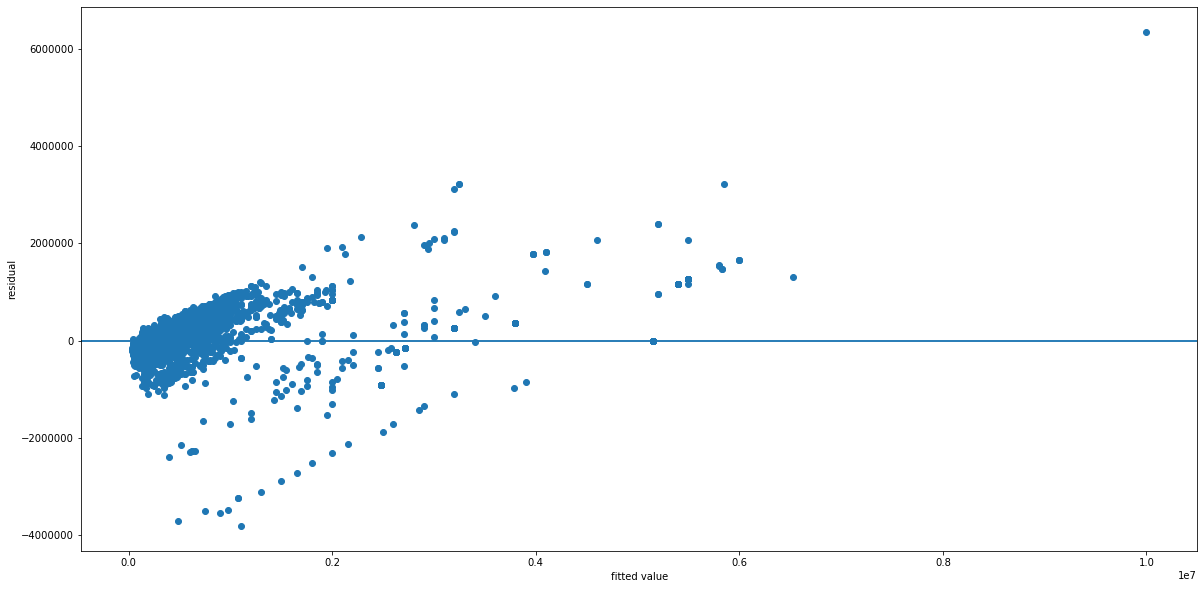

In [41]:
plt.figure(figsize = (20,10))
plt.scatter(y_train,model.resid.values)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()

((array([-3.58731592, -3.34902408, -3.21753579, ...,  3.21753579,
          3.34902408,  3.58731592]),
  array([-3815273.97511144, -3710417.63402916, -3541204.13311878, ...,
          3220172.44048182,  3229829.07225976,  6353695.83220594])),
 (424314.7399621239, 100846.99987573303, 0.9153267819404083))

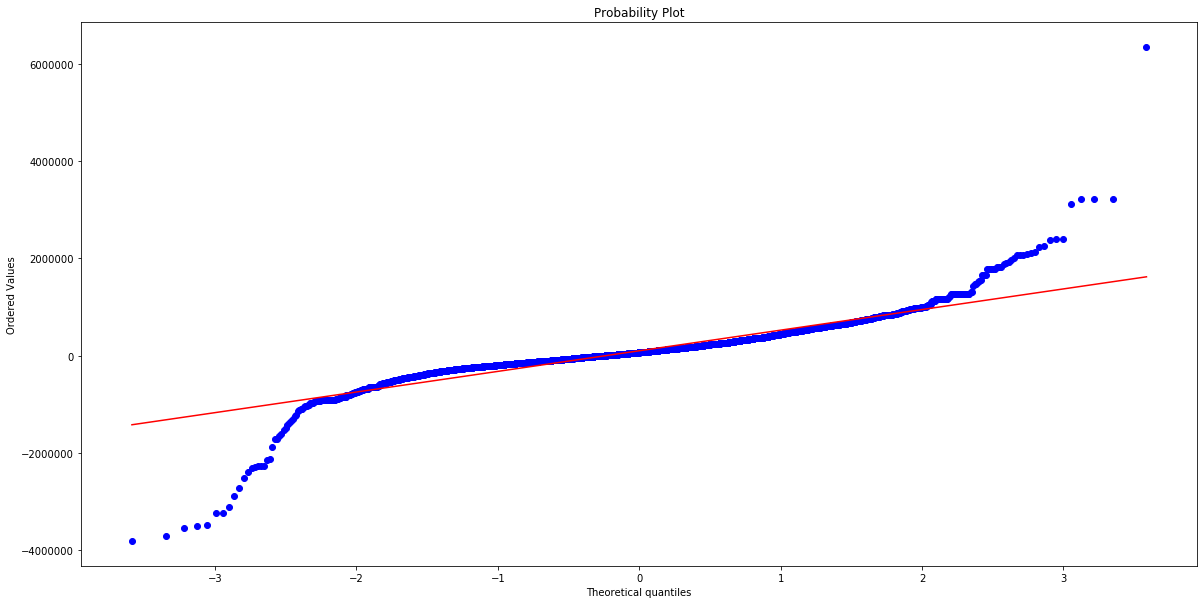

In [42]:
import scipy as sp
fig, ax = plt.subplots(figsize=(20,10))
sp.stats.probplot(model.resid.values, plot=ax, fit=True)

### Heterocedasticidade (Breusch-Pagan)

In [43]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 1053.6784296922087),
 ('p-value', 5.0986613633141845e-208),
 ('f-value', 58.507969524258556),
 ('f p-value', 7.991537758630438e-241)]

The null hypothesis (H0): Homoscedasticity is present.

-> The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists) <-

### Normalidade dos residuos (Shapiro-Wilk)

In [44]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(model.resid.values)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Os erros estão distrubuídos normalmente')
else:
	print('Rejeitamos H0. Não podemos afirmar que os erros estão distrubuídos normalmente')

Statistics=0.840, p=0.000
Rejeitamos H0. Não podemos afirmar que os erros estão distrubuídos normalmente


### Erros independentes (Durbin-Watson)

In [45]:
# !pip install dwtest

In [46]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid.values)

1.892560195629535

The null hypothesis of the test is that there is no serial correlation in the residuals. The Durbin-Watson test statistic is defined as:

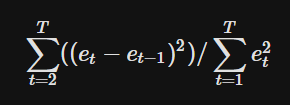

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

## Validação do Modelo

In [47]:
# Fazendo a predição
predictions = model.predict(X_test[selected_features_BE])

In [48]:
predictions

15      1.167565e+06
3362   -2.562164e+04
516     4.663165e+05
4252    3.587957e+05
4690    2.194261e+05
            ...     
5572    1.167564e+06
545     1.305395e+05
3525    3.536384e+05
4890    2.675196e+06
662     4.638803e+04
Length: 1383, dtype: float64

In [49]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model.rsquared

0.7956894070366027

In [50]:
# Criando um DataFrame com o preço e suas prediçoes

df = pd.DataFrame({'selling_price':y_test, 'Resultado':predictions})

In [51]:
df

,selling_price,Resultado
15,570000,1.167565e+06
3362,650000,-2.562164e+04
516,775000,4.663165e+05
4252,350000,3.587957e+05
4690,400000,2.194261e+05
...,...,...
5572,869999,1.167564e+06
545,900000,1.305395e+05
3525,551000,3.536384e+05
4890,2600000,2.675196e+06


O gráfico de dispersão abaixo pontua o valor predito pelo real selling price.

Quanto maior o R^2 do modelo, quanto mais ajustado ao centro tanto os pontos quanto a reta verde se posiciona, o valor predito é mais próximo ao selling_price 

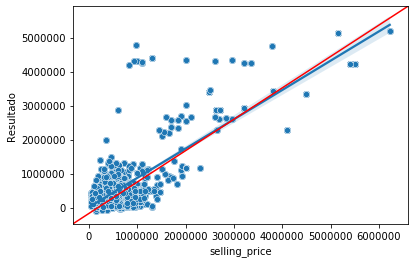

In [52]:
# Plotando o Grafico do preço em relaçao as prediçoes
import matplotlib.lines as mlines

fig, ax = plt.subplots()
sns.regplot(x="selling_price", y="Resultado", data=df);
sns.scatterplot(x='selling_price',y='Resultado', data=df)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [53]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['selling_price'],predictions)

In [54]:
print ("r-squared:", r_value**2)

r-squared: 0.7063226257230241
